Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Saving Reviews_small_demo.csv to Reviews_small_demo (2).csv
Classification Report:

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       1.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

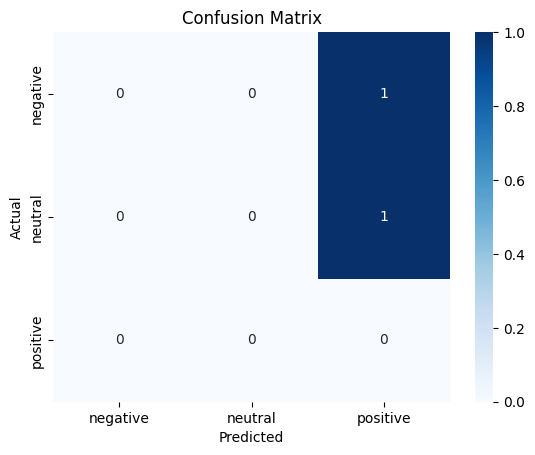

In [1]:
# STEP 0: Setup NLTK clean install and downloads
!pip uninstall -y nltk
!pip install nltk --no-cache-dir

import shutil
shutil.rmtree('/root/nltk_data', ignore_errors=True)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# STEP 1: Upload your dataset CSV file
from google.colab import files
uploaded = files.upload()

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer, TreebankWordTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# STEP 3: Load data
df = pd.read_csv(list(uploaded.keys())[0])

# STEP 4: Label sentiments
def label_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

df['Sentiment'] = df['Score'].apply(label_sentiment)

# STEP 5: Preprocessing with explicit tokenizers to avoid punkt_tab error
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

sentence_tokenizer = PunktSentenceTokenizer()
word_tokenizer = TreebankWordTokenizer()

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    sentences = sentence_tokenizer.tokenize(text)
    tokens = []
    for sentence in sentences:
        tokens.extend(word_tokenizer.tokenize(sentence))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Clean_Text'] = df['Text'].apply(preprocess)

# STEP 6: TF-IDF vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Clean_Text'])
y = df['Sentiment']

# STEP 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 8: Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# STEP 9: Predictions and evaluation
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# STEP 10: Confusion matrix plot
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
